<a href="https://colab.research.google.com/github/YashChaudhary16/PyTorch/blob/main/01_PyTorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np

1. Data (prepare and load)
2. Build Model
3. Fitting the model to the data (training)
4. Making predictions and evaluating the model (inference)
5. Saving and loading a model
6. Putting it all together

In [2]:
from torch import nn # nn contains all of PyTorch's building block for Neural Networks
import matplotlib.pyplot as plt

# 1. Data: Preparing & Loading

## Create data

In [3]:
# Create known parameters
weight = 0.8
bias = 0.16

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

print(X.shape, y.shape)
X[:10], y[:10]

torch.Size([50, 1]) torch.Size([50, 1])


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.1600],
         [0.1760],
         [0.1920],
         [0.2080],
         [0.2240],
         [0.2400],
         [0.2560],
         [0.2720],
         [0.2880],
         [0.3040]]))

## Create train and test data

In [4]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

## Visualize data

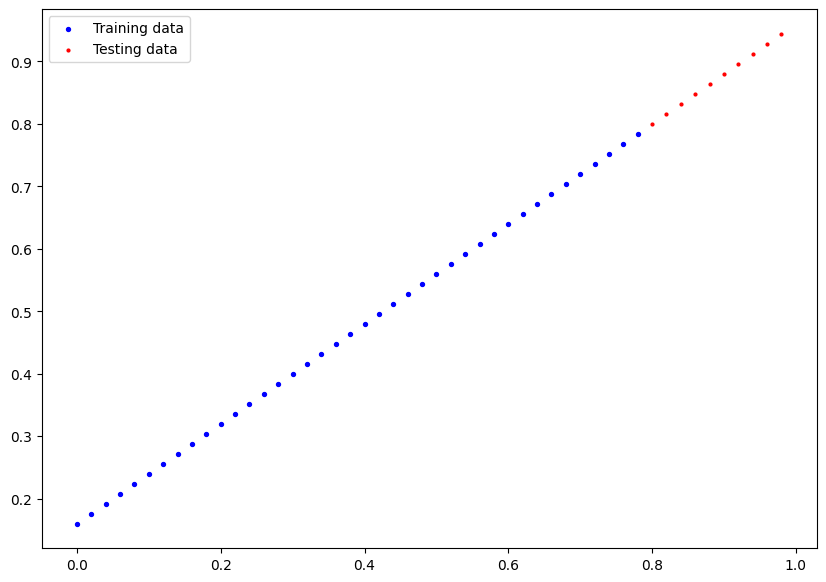

In [5]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels,c='b',s=8,label='Training data')
  plt.scatter(test_data,test_labels,c='r',s=4,label='Testing data')

  if predictions is not None:
    plt.scatter(test_data,predictions,c='g',s=10,label='Predictions')
  plt.legend()
  plt.show()

plot_predictions()

# First PyTorch Model

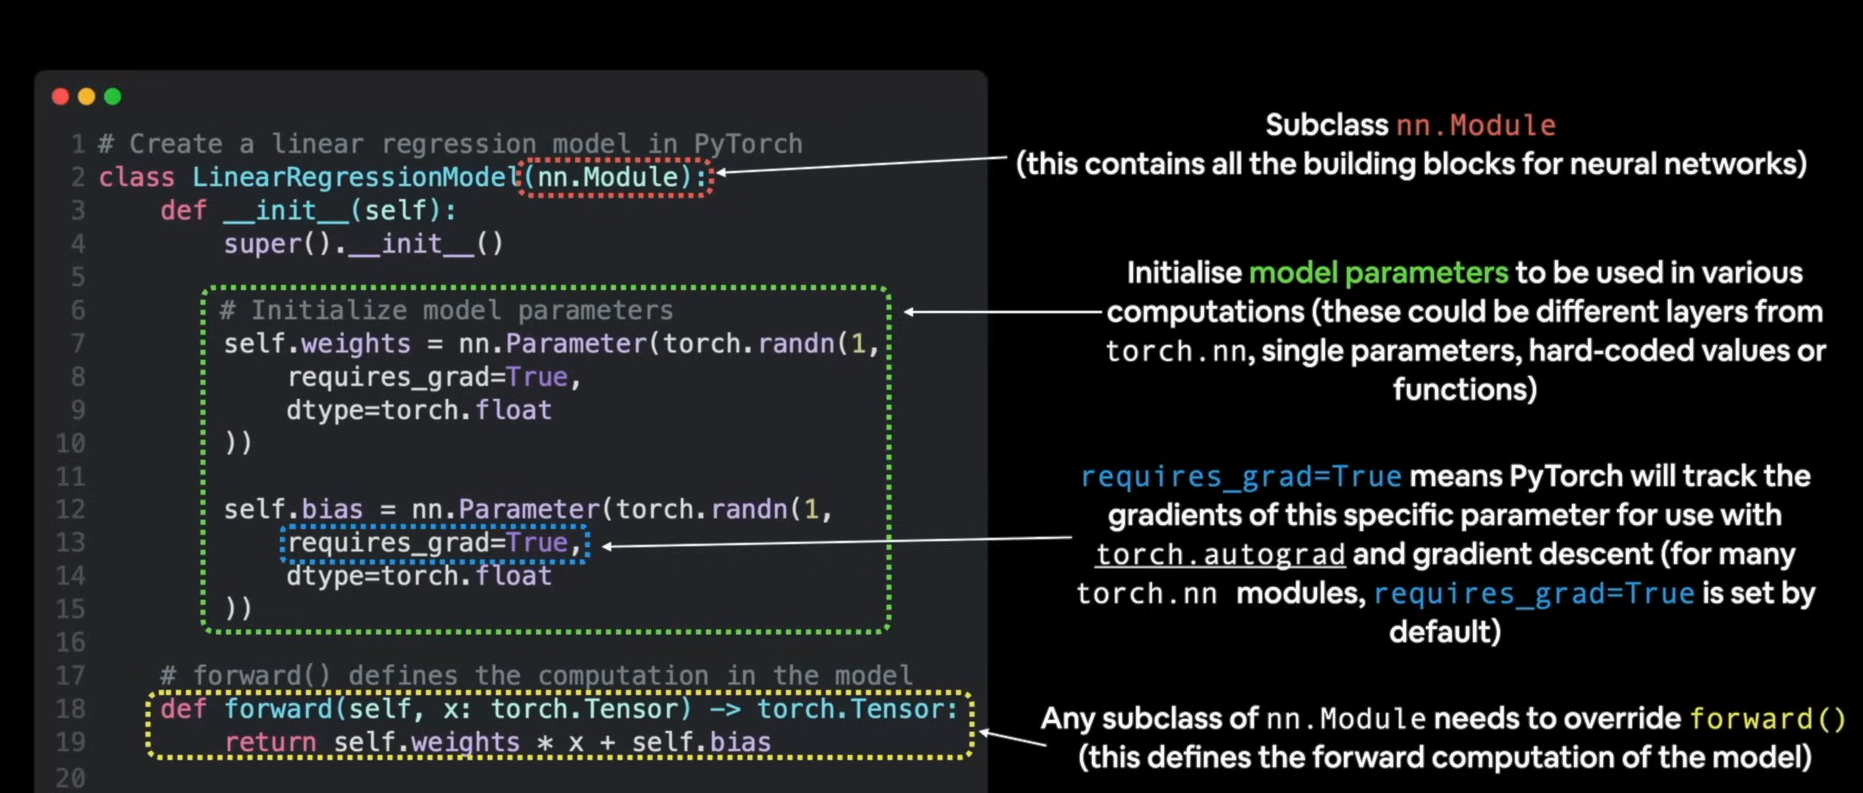

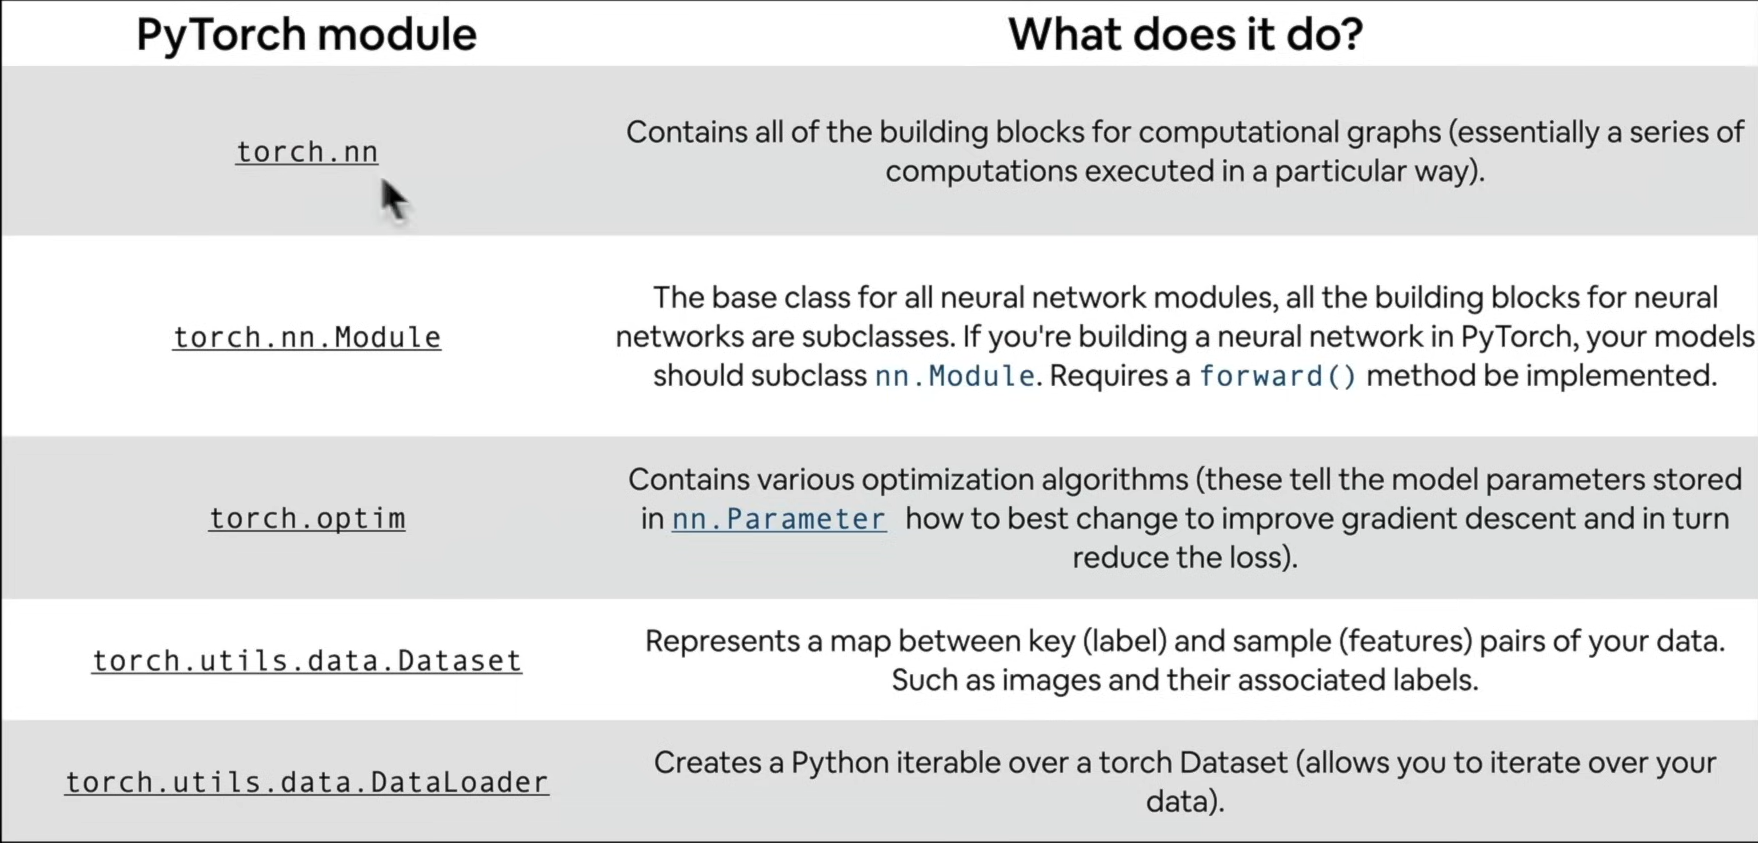


In [6]:
class LinearRegressionModel_0(nn.Module): # almost everything in PyTorch inherits from nn.Module, it is lego buiding bricks of PyTorch
    def __init__(self):
      super().__init__()
      self.weights = nn.Parameter(torch.randn(1, # <- start with random values and try to adjust it to the ideal weight
                                              requires_grad=True, # To keep track of gradients
                                              dtype=torch.float))
      self.bias = nn.Parameter(torch.randn(1,
                                          requires_grad=True,
                                          dtype=torch.float))

    # Forward method to define computation in the model
    def forward(self, x:torch.Tensor) -> torch.Tensor: # x is the input data
      return self.weights * x + self.bias # linear regression formula


## Checking the content of our model

In [7]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of model
model_0 = LinearRegressionModel_0()

# Checking parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [8]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

## Make predictions with model

In [9]:
# Make predictions with model

with torch.inference_mode(): # Disables all useful thing behind training, makes your code faster.
  y_pred = model_0(X_test)

'''You can also do something similar with torch.no_grad() but inference_mode is preferred'''
y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

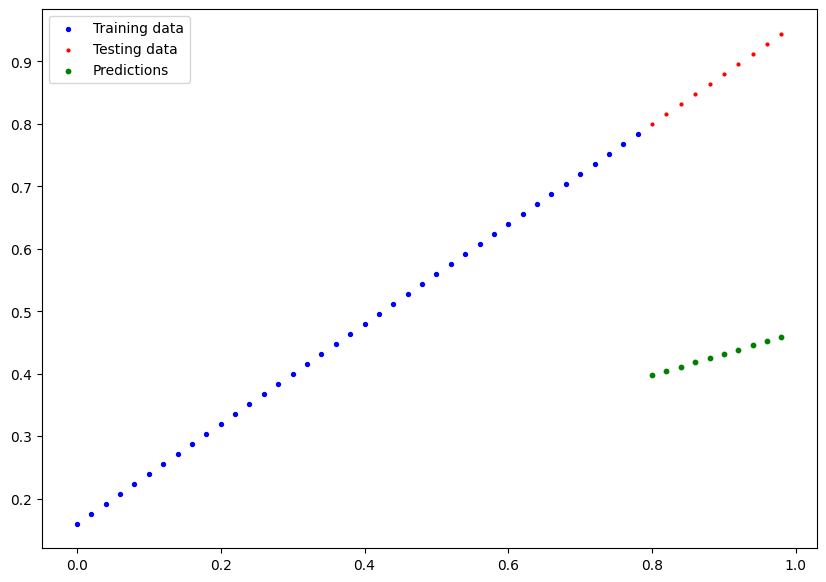

In [10]:
plot_predictions(predictions=y_pred)

## We need 2 things to train

1. Loss Function: A function to measure how wrong your model's predictions are.
2. Optimizer: Takes into account the loss of a model and adjusts model's parameters accordingly.

In [11]:
# Loss Function
loss_fn_0 = nn.L1Loss()

# Optimizer
optimizer_0 = torch.optim.Adam(params=model_0.parameters(),
                               lr = 0.01) # LR - Learning Rate is one of the most important parameter while training a model

## Building a training loop in PyTorch

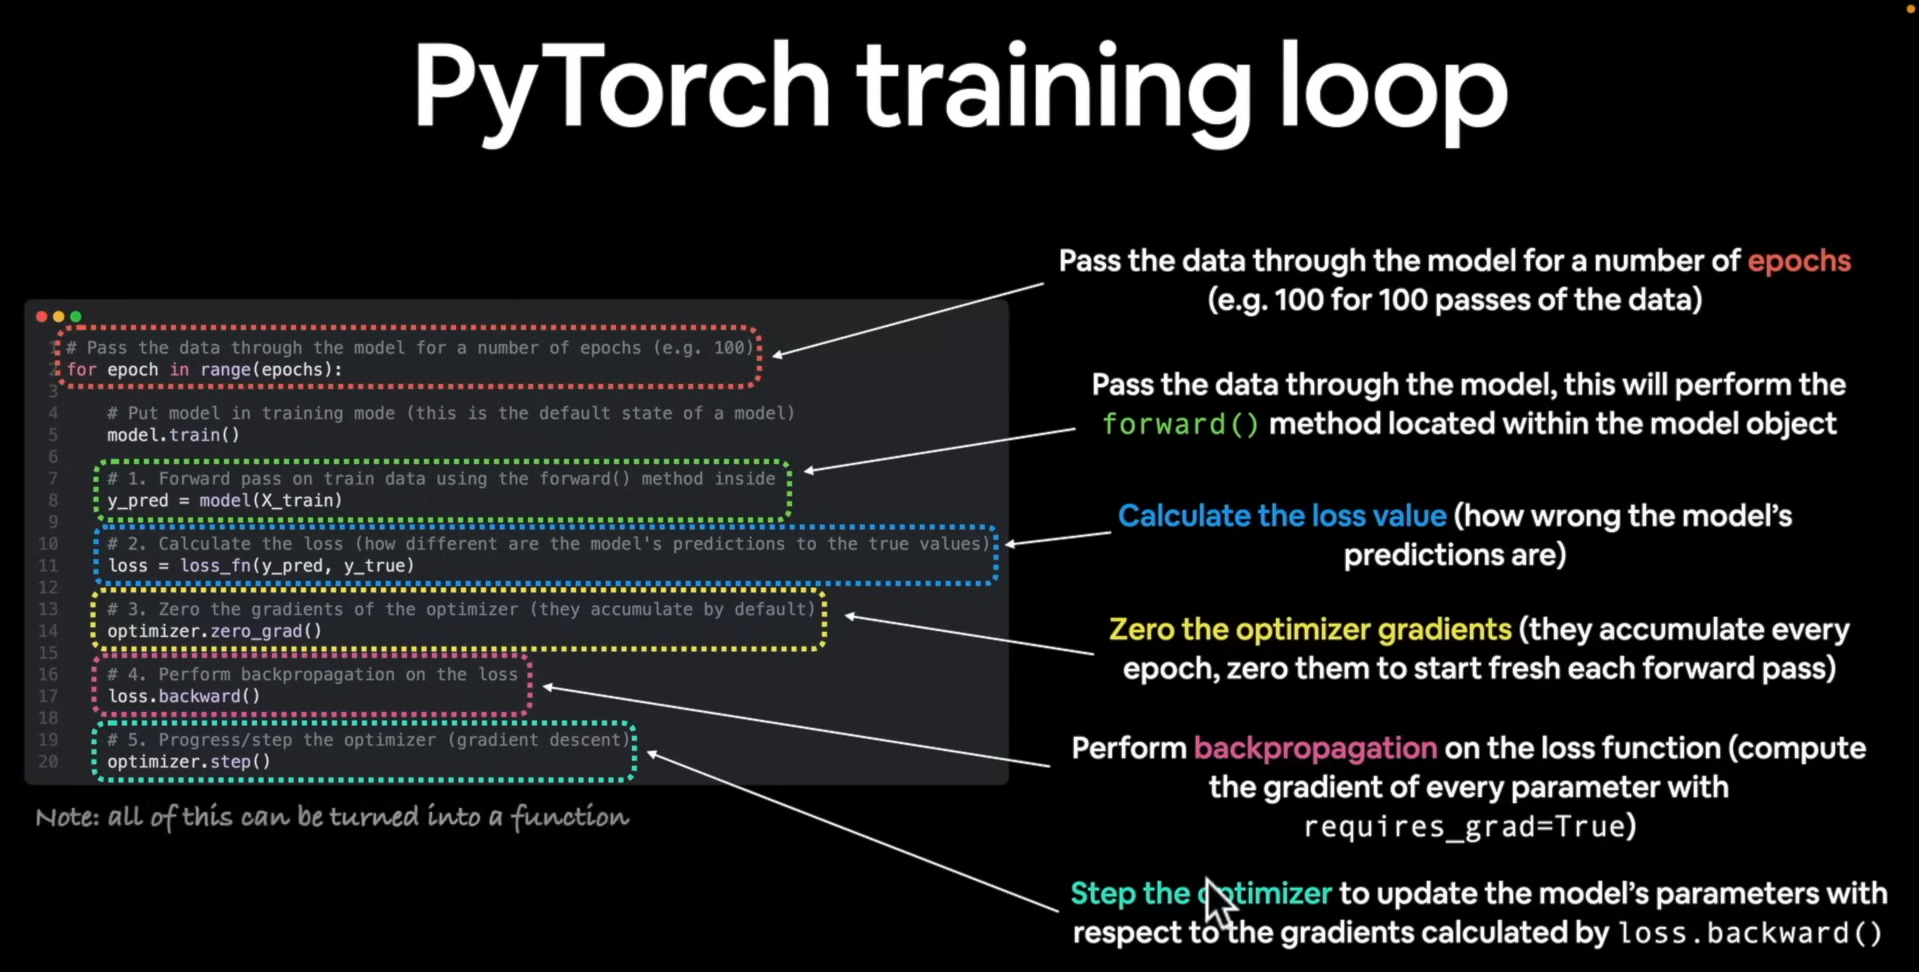

In [12]:
epochs = 100 # An epoch is one loop through the data

test_loss_values = []
train_loss_values = []

for epoch in range(epochs):
  model_0.train() # Put model in train mode - sets all params that require gradients to require gradients

  # 1. Forward pass
  y_pred_0 = model_0.forward(X_train)

  # 2. Calculate the loss
  loss_0 = loss_fn_0(y_pred_0, y_train)

  # 3. Optimizer zero grad
  optimizer_0.zero_grad()

  # 4. Loss backward
  loss_0.backward()

  # 5. Optimizer step
  optimizer_0.step()

  model_0.eval() # Turns off the gradient tracking.
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn_0(test_pred, y_test)

  train_loss_values.append(loss_0.detach().numpy())
  test_loss_values.append(test_loss)


## Visualizing Loss

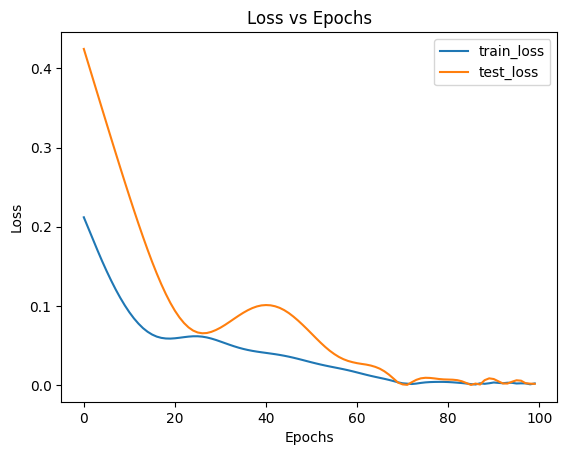

In [13]:
plt.plot(range(0,epochs), train_loss_values)
plt.plot(range(0,epochs), test_loss_values)
plt.legend(['train_loss', 'test_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()

## Making predictions

In [14]:
with torch.inference_mode():
  y_pred = model_0(X_test)

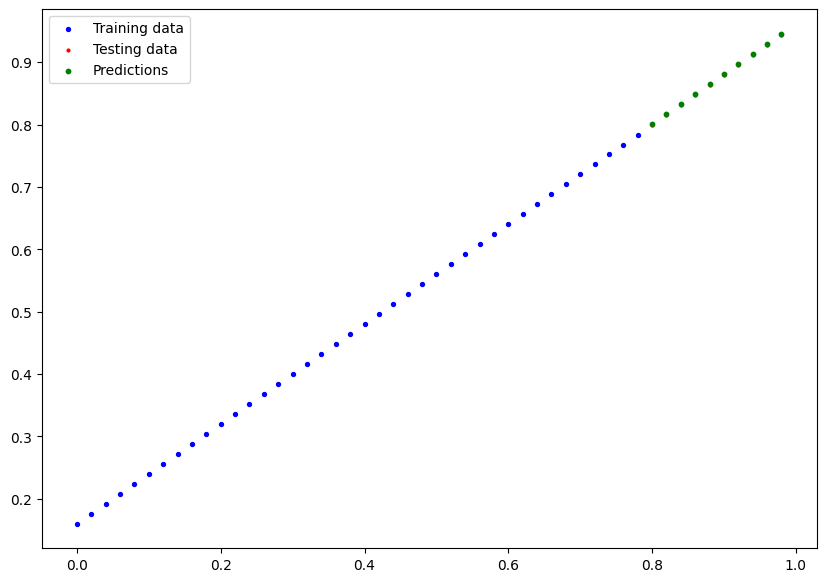

In [15]:
plot_predictions(predictions=y_pred)

In [16]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.8011])), ('bias', tensor([0.1604]))])

## Saving a model in PyTorch

* There are *3 main methods* to save and load models.

1. **torch.save()** - allows you to save a PyTorch object in Python's pickle format
2. **torch.load()** - allows you to load a saved PyTorch object.
3. **torch.nn.Module.load_state_dict()** - this allows to load a model's saved state dictionary

In [17]:
# Saving our PyTorch model
from pathlib import Path

#1. Create Models Directory
MODEL_PATH = Path('model')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = 'model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: model/model_0.pth


In [18]:
# Loading a PyTorch model
loaded_model_0 = LinearRegressionModel_0()
print(f'Model loaded: {loaded_model_0.state_dict()}')

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
print(f'Loaded state dict: {loaded_model_0.state_dict()}')

Model loaded: OrderedDict([('weights', tensor([0.2345])), ('bias', tensor([0.2303]))])
Loaded state dict: OrderedDict([('weights', tensor([0.8011])), ('bias', tensor([0.1604]))])


<ipython-input-18-aa730cd441c4>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


# Getting everything together

In [19]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

## 1. Data Loading/Creation

In [20]:
# Parameters
weight_exc = 0.6723
bias_exc = 0.3

# Data
start = 1
end = 100
step = 0.5
data_exc = torch.arange(start, end, step)
labels_exc = weight_exc * data_exc + bias_exc

# Split
train_split = int(0.8 * len(data_exc))
X_train, y_train = data_exc[:train_split], labels_exc[:train_split]
X_test, y_test = data_exc[train_split:], labels_exc[train_split:]

## 2. Build the model

In [21]:
# Making the Linear Regression Model
class LR_exc(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Create a random seed
torch.manual_seed(42)

model_exc = LR_exc().to(device)

# Setting up the loss function
loss_exc = nn.MSELoss()

# Setting up the optimizer
optimizer_exc = torch.optim.Adam(params=model_exc.parameters(),
                                 lr=0.01
                                 )

## 3. Fit the model to data

In [22]:
# Load data on GPU
X_train = X_train.to(device).unsqueeze(dim=1)
y_train = y_train.to(device).unsqueeze(dim=1)
X_test = X_test.to(device).unsqueeze(dim=1)
y_test = y_test.to(device).unsqueeze(dim=1)

# Set up the loop
EPOCHS = 100

# To keep track of the loss throughout the loop
train_loss_exc = []
test_loss_exc = []

for epoch in range(EPOCHS):

  # set model to train
  model_exc.train()

  # 1. Forward pass
  y_train_pred = model_exc(X_train)

  # 2. Calculate loss
  loss_exc_train = loss_exc(y_train_pred, y_train)

  # 3. Setup optimizer
  optimizer_exc.zero_grad()

  # 4. Backpropagation
  loss_exc_train.backward()

  # 5. Gradient Descent
  optimizer_exc.step()

  # Testing
  model_exc.eval()
  with torch.inference_mode():
    model_exc_test_pred = model_exc(X_test)
    loss_exc_test = loss_exc(model_exc_test_pred, y_test)

  train_loss_exc.append(loss_exc_train.detach().cpu().numpy())
  test_loss_exc.append(loss_exc_test.detach().cpu().numpy())

## 4. Evaluate the model

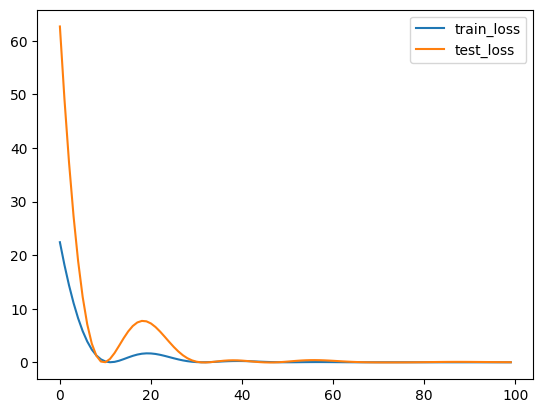

In [23]:
plt.plot(range(0,EPOCHS), train_loss_exc)
plt.plot(range(0,EPOCHS), test_loss_exc)
plt.legend(['train_loss', 'test_loss'])
plt.show()

In [24]:
X_test.cpu().shape, y_test.cpu().shape

(torch.Size([40, 1]), torch.Size([40, 1]))

In [25]:
model_exc.eval()
with torch.inference_mode():
  model_exc_test_pred = model_exc(X_test)

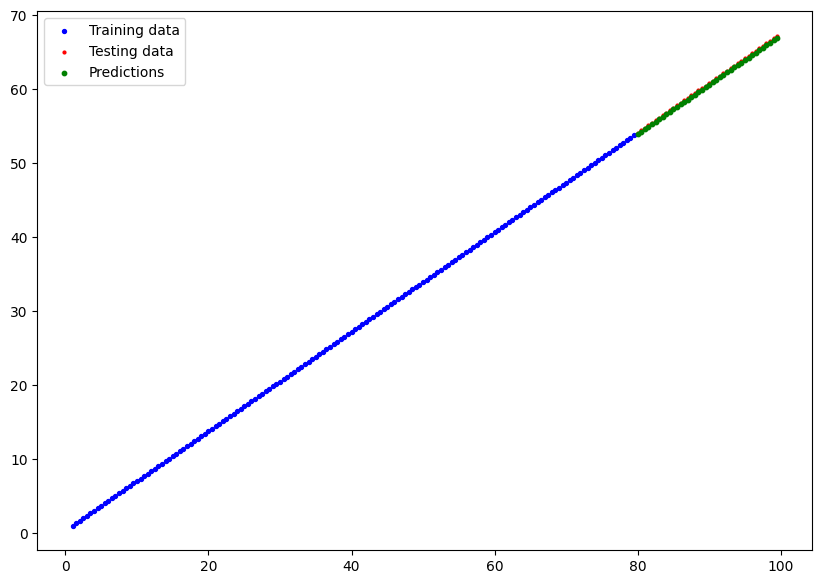

In [26]:
plot_predictions(train_data=X_train.cpu(),
                 train_labels=y_train.cpu(),
                 test_data=X_test.cpu(),
                 test_labels=y_test.cpu(),
                 predictions=model_exc_test_pred.cpu())

In [27]:
model_exc.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6657]])),
             ('linear_layer.bias', tensor([0.6616]))])

## 5. Saving & Loading the model

In [28]:
# Saving the whole model
PATH_EXC = ('model/model_exc.pth')
torch.save(model_exc, PATH_EXC)

In [29]:
# Loading the model
torch.manual_seed(42)

model_exc_1 = LR_exc()
print(model_exc_1.state_dict())

model_exc_1= torch.load(PATH_EXC, weights_only=False)
print(model_exc_1.state_dict())

OrderedDict([('linear_layer.weight', tensor([[0.7645]])), ('linear_layer.bias', tensor([0.8300]))])
OrderedDict([('linear_layer.weight', tensor([[0.6657]])), ('linear_layer.bias', tensor([0.6616]))])
